In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("Iris.csv")
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(["Id"],axis=1,inplace=True)

In [4]:
print(df.shape)
df.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'PetalWidth')

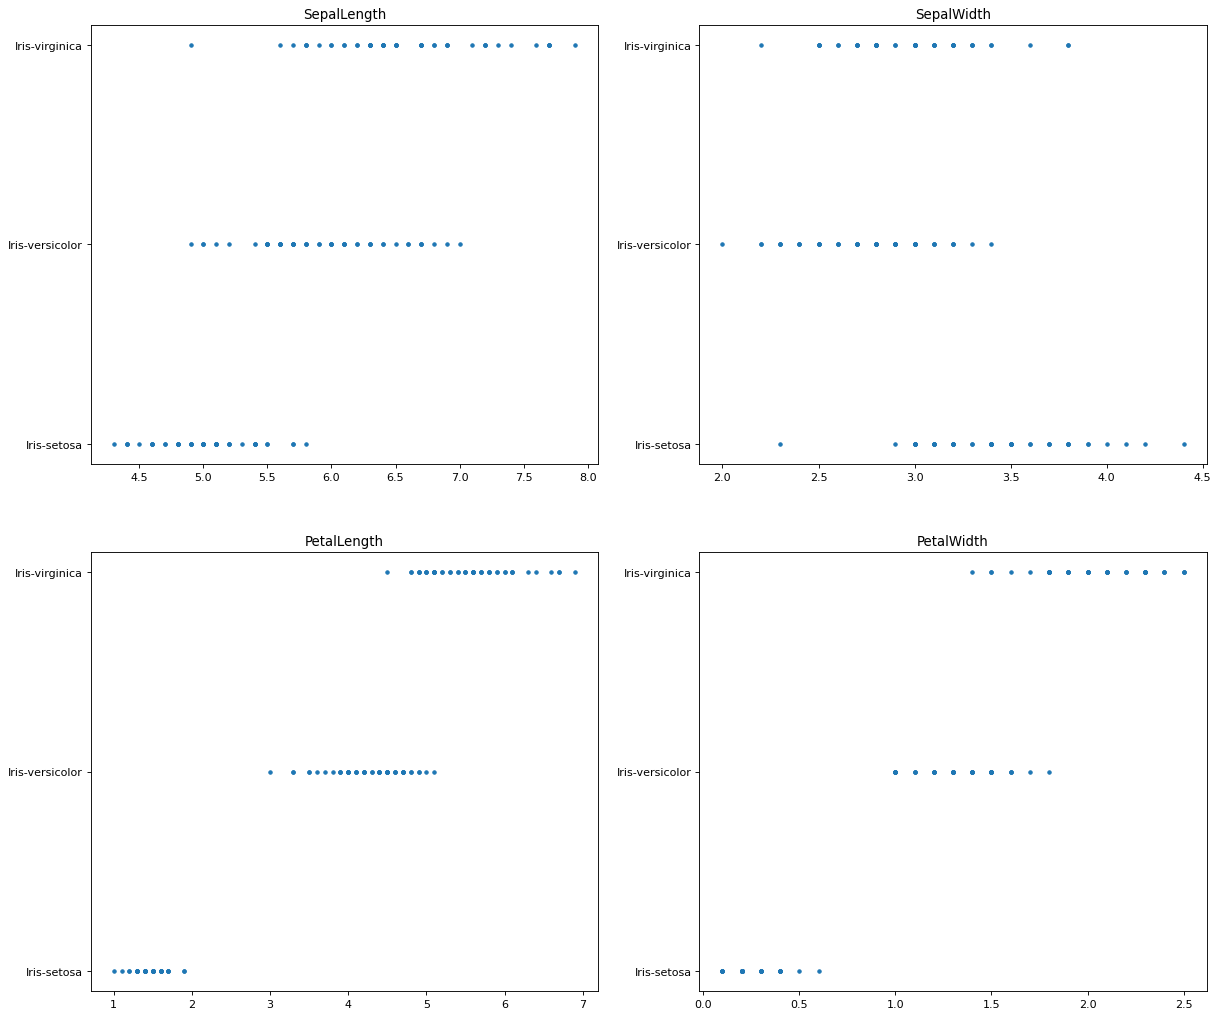

In [5]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')


plt.subplot(2,2,1)
plt.scatter(df["SepalLengthCm"],df["Species"],marker='.')
plt.title("SepalLength")
plt.subplot(2,2,2)
plt.scatter(df["SepalWidthCm"],df["Species"],marker='.')
plt.title("SepalWidth")
plt.subplot(2,2,3)
plt.scatter(df["PetalLengthCm"],df["Species"],marker='.')
plt.title("PetalLength")
plt.subplot(2,2,4)
plt.scatter(df["PetalWidthCm"],df["Species"],marker='.')
plt.title("PetalWidth")

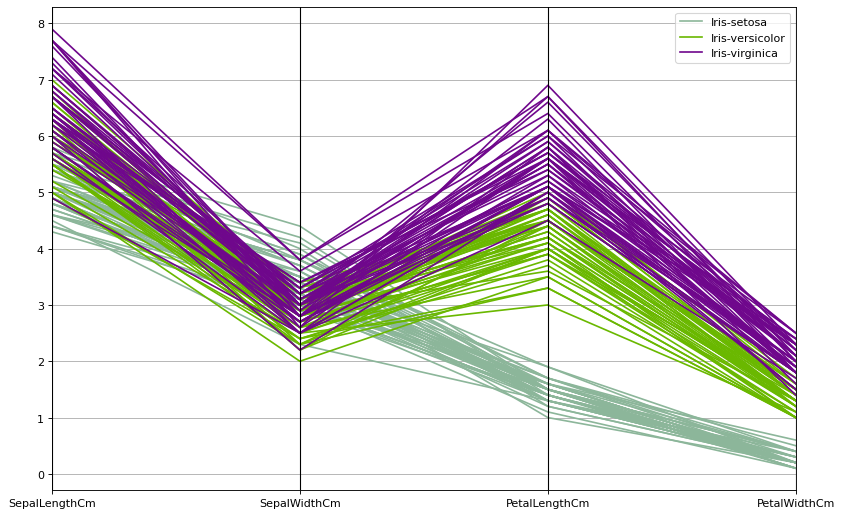

In [6]:
#from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.style.use('seaborn-colorblind')
pd.plotting.parallel_coordinates(df, 'Species');

<Figure size 1440x1280 with 0 Axes>

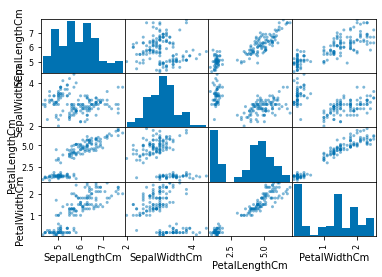

In [7]:
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
pd.plotting.scatter_matrix(df);

In [8]:
X = df.iloc[:, [0, 1, 2, 3]].values

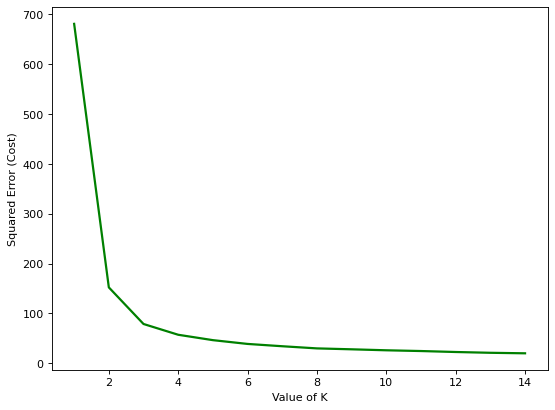

In [9]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

cost=[]
for i in range(1,15):
    km = KMeans(n_clusters=i,max_iter=500)
    km.fit(X)
    cost.append(km.inertia_)
    
plt.plot(range(1, 15), cost, color ='g', linewidth ='2') 
plt.xlabel("Value of K") 
plt.ylabel("Squared Error (Cost)") 
plt.show()

In [10]:
#Hence we find that optimum number of clusters is 3

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
model = kmeans.fit(X)
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [12]:
y_kmeans = model.predict(X)

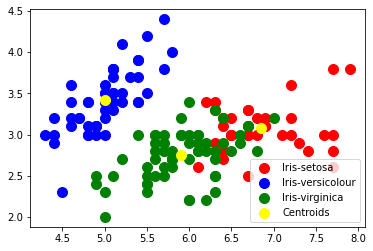

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()